## 1. DATA DESCRIPTION

First, load the necessary libraries for handling data and performing exploratory analysis. Then load the datasets `players.csv` and `sessions.csv`

In [1]:
#Load possibly useful libraries for any manipulation
library(readr)   
library(dplyr) 
library(lubridate)
library(repr)
library(tidymodels)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.1.2
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard()  masks scales::discard()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::sp

In [2]:
# Load first data file
options(repr.matrix.max.rows = 10)
players <- read.csv("data/players.csv")
players

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17,NA,NA
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22,NA,NA
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA


The `players.csv` dataset consists of 196 observations and 9 variables, each capturing various attributes of individual players on the research server. The columns in this dataset provide details about players’ gaming experience levels, subscription status, hashed email IDs, hours played, names, gender, age, individual identifiers, and organizations. Each players' record includes:

- **experience:** Each player’s level of gaming experience (ranging from "Amateur" to "Veteran" or "Pro.")
- **subscribe:** Indicates whether the player is subscribed to updates or communications from the server PlaiCraft.
- **hashedEmail:** A unique, hashed email ID for each player, serving as an anonymous identifier.
- **played_hours:** Total hours each player has spent on the server, recorded as a numeric value.
- **name:** The name of the player.
- **gender:** Player’s self-identified gender.
- **age:** Player's age in years.
- **individualId** and **organizationName:** Both currently contain NA values, suggesting missing data or placeholders for potential identifiers of individual players and their organizations.

There are missing values in the individualId and organizationName fields for every record of players which may limit some of the analysis and suggested to be filtered out in the further manipulation steps as they don't hold any significance. 


In [3]:
options(repr.matrix.max.rows = 10)
sessions <- read.csv("data/sessions.csv")
sessions

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
⋮,⋮,⋮,⋮,⋮
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,10/05/2024 23:01,10/05/2024 23:07,1.71538e+12,1.71538e+12
7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,01/07/2024 04:08,01/07/2024 04:19,1.71981e+12,1.71981e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12


The `sessions.csv` dataset comprises 1535 observations and 5 variables, each recording a session entry for individual players on the research server. This dataset contains data about session timestamps for each player, allowing for analysis of player engagement patterns over time. Each record includes:

- **hashedEmail:** A unique, hashed email ID that matches the identifier in players.csv to maintain anonymity while linking player records.
- **start_time:** The session start timestamp in the format "DD/MM/YYYY HH," indicating the date and time a player began a session on the server.
- **end_time:** The certain session's end timestamp in the same format, specifying when a player completed their specific session.
- **original_start_time** and **original_end_time:** Numeric representations of the start and end times, stored as UNIX epoch timestamps.
  
This dataset includes character and numeric data types, offering an opportunity to analyze session frequency, duration, and distribution across different players and timeframes. The presence of hashed email IDs aligns this dataset with the ones provided in `players.csv`, enabling cross-referencing between two data sets for more general analysis. As the date fields are in character format, they may require conversion to a datetime format to facilitate time-based analysis. This dataset is valuable for understanding peak activity times, session length trends, and player retention on the server, contributing to insights on player engagement and server usage patterns.

In addition, in this dataset, the variables `original_start_time` and `original_end_time` are recorded in a numeric format rather than a standard date format. This numeric format is likely a UNIX timestamps, which record the time as the number of seconds since January 1, 1970. Because they’re not in a readable date format, analyzing or comparing these times directly is challenging. To effectively use these for any date-related analysis, it would be useful to convert them into a standard date-time format.

## 2. RESEARCH QUESTION AND METHOD

**The general research question** is: *"We would like to know which 'kinds' of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts."* To make this question more specific, we will focus on predicting the number of hours a player is likely to contribute based on certain player characteristics.

Our **refined research question** is: *"Can a player's age, gender and experience levels predict the number of hours they will contribute to the game, which we will use as a proxy for their data contribution?"*

To answer this, we will use player characteristics, such as experience level, age, and gender, as explanatory variables to predict the total hours played. We hypothesize that more experienced players (e.g., "Veterans" or "Pro" players) and players within certain age groups may contribute more hours, thus producing more data. By predicting the number of hours played, we can identify which player characteristics are most strongly associated with high data contribution, allowing us to target those players in our recruitment efforts.

## 3. EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [52]:
options(repr.matrix.max.rows = 10)
# Selecting required columns and eliminating the ones without data
players_data <- players |>
    select(played_hours, name, gender, age, hashedEmail)
players_data

played_hours,name,gender,age,hashedEmail
<dbl>,<chr>,<chr>,<int>,<chr>
30.3,Morgan,Male,9,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d
3.8,Christian,Male,17,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9
0.0,Blake,Male,17,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28
0.7,Flora,Female,21,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5
0.1,Kylie,Male,21,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e
⋮,⋮,⋮,⋮,⋮
0.0,Bailey,Female,17,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f
0.3,Pascal,Male,22,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd
0.0,Dylan,Prefer not to say,17,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb


In [38]:
# Check the overall data with possible missing values
summary(players_data)

  played_hours         name              gender               age       
 Min.   :  0.000   Length:196         Length:196         Min.   : 8.00  
 1st Qu.:  0.000   Class :character   Class :character   1st Qu.:17.00  
 Median :  0.100   Mode  :character   Mode  :character   Median :19.00  
 Mean   :  5.846                                         Mean   :21.28  
 3rd Qu.:  0.600                                         3rd Qu.:22.00  
 Max.   :223.100                                         Max.   :99.00  
 hashedEmail       
 Length:196        
 Class :character  
 Mode  :character  
                   
                   
                   

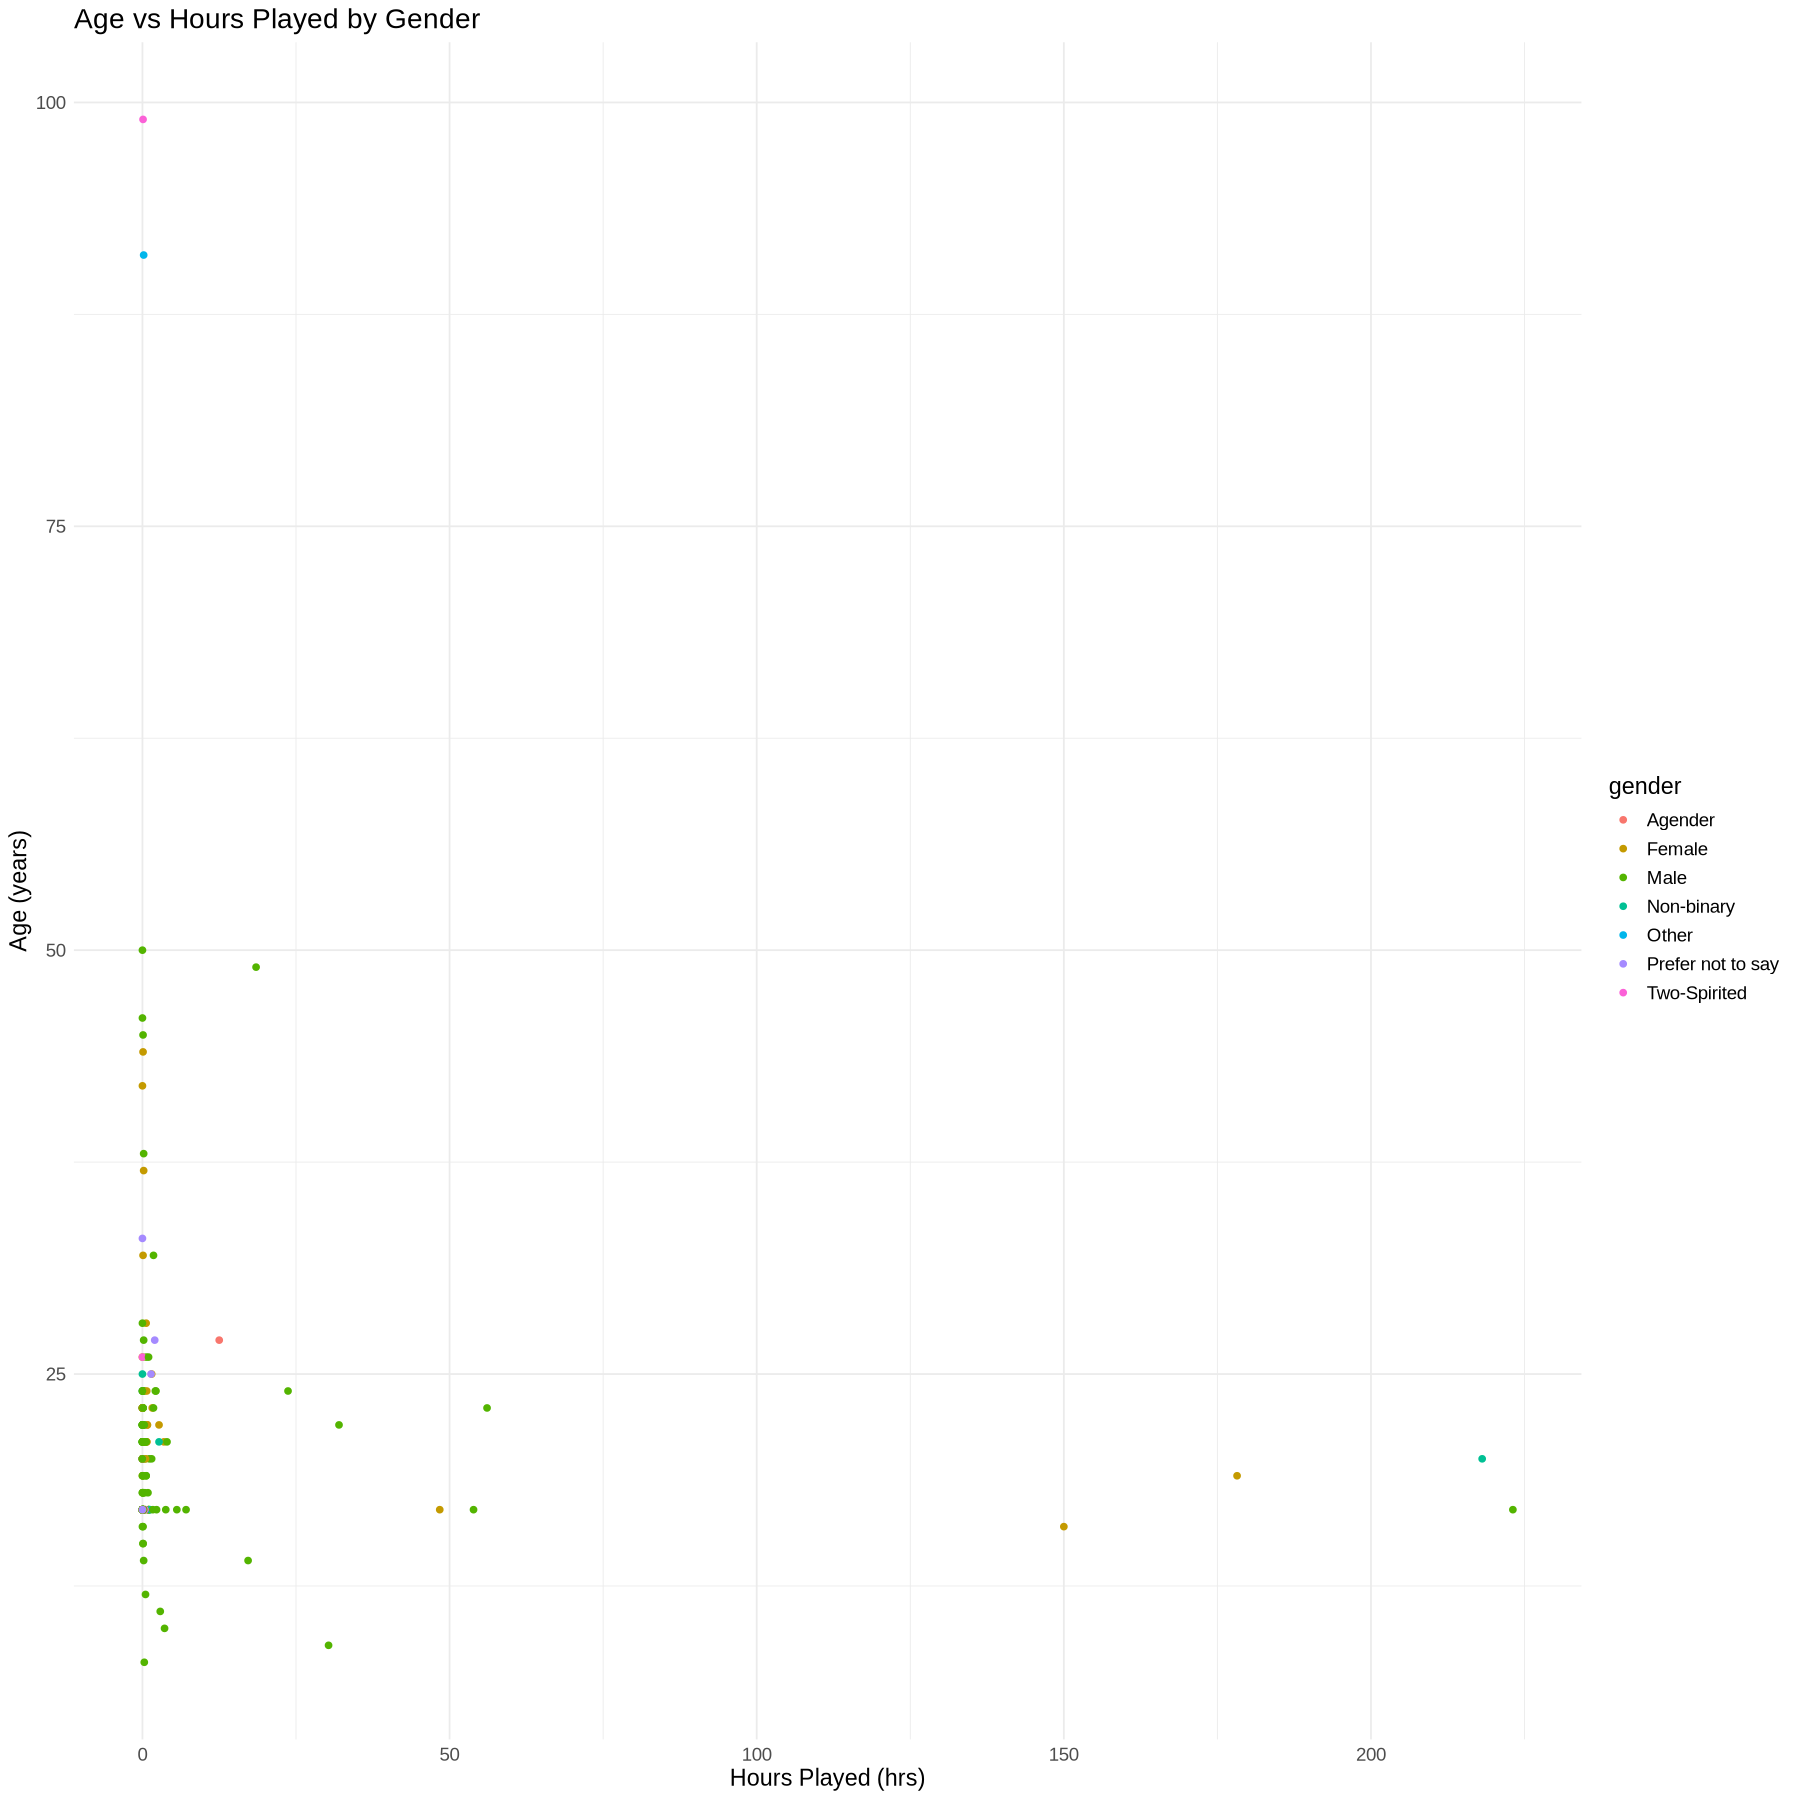

In [39]:
# Scatter plot for age vs hours played, colored by gender to see the distribution among the data
options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(players_data, aes(x = played_hours, y = age, color = gender)) +
    geom_point() +
    labs(title = "Age vs Hours Played by Gender", 
         x = "Hours Played (hrs)", 
         y = "Age (years)") +
    theme_minimal() +
    theme(text = element_text(size = 14))

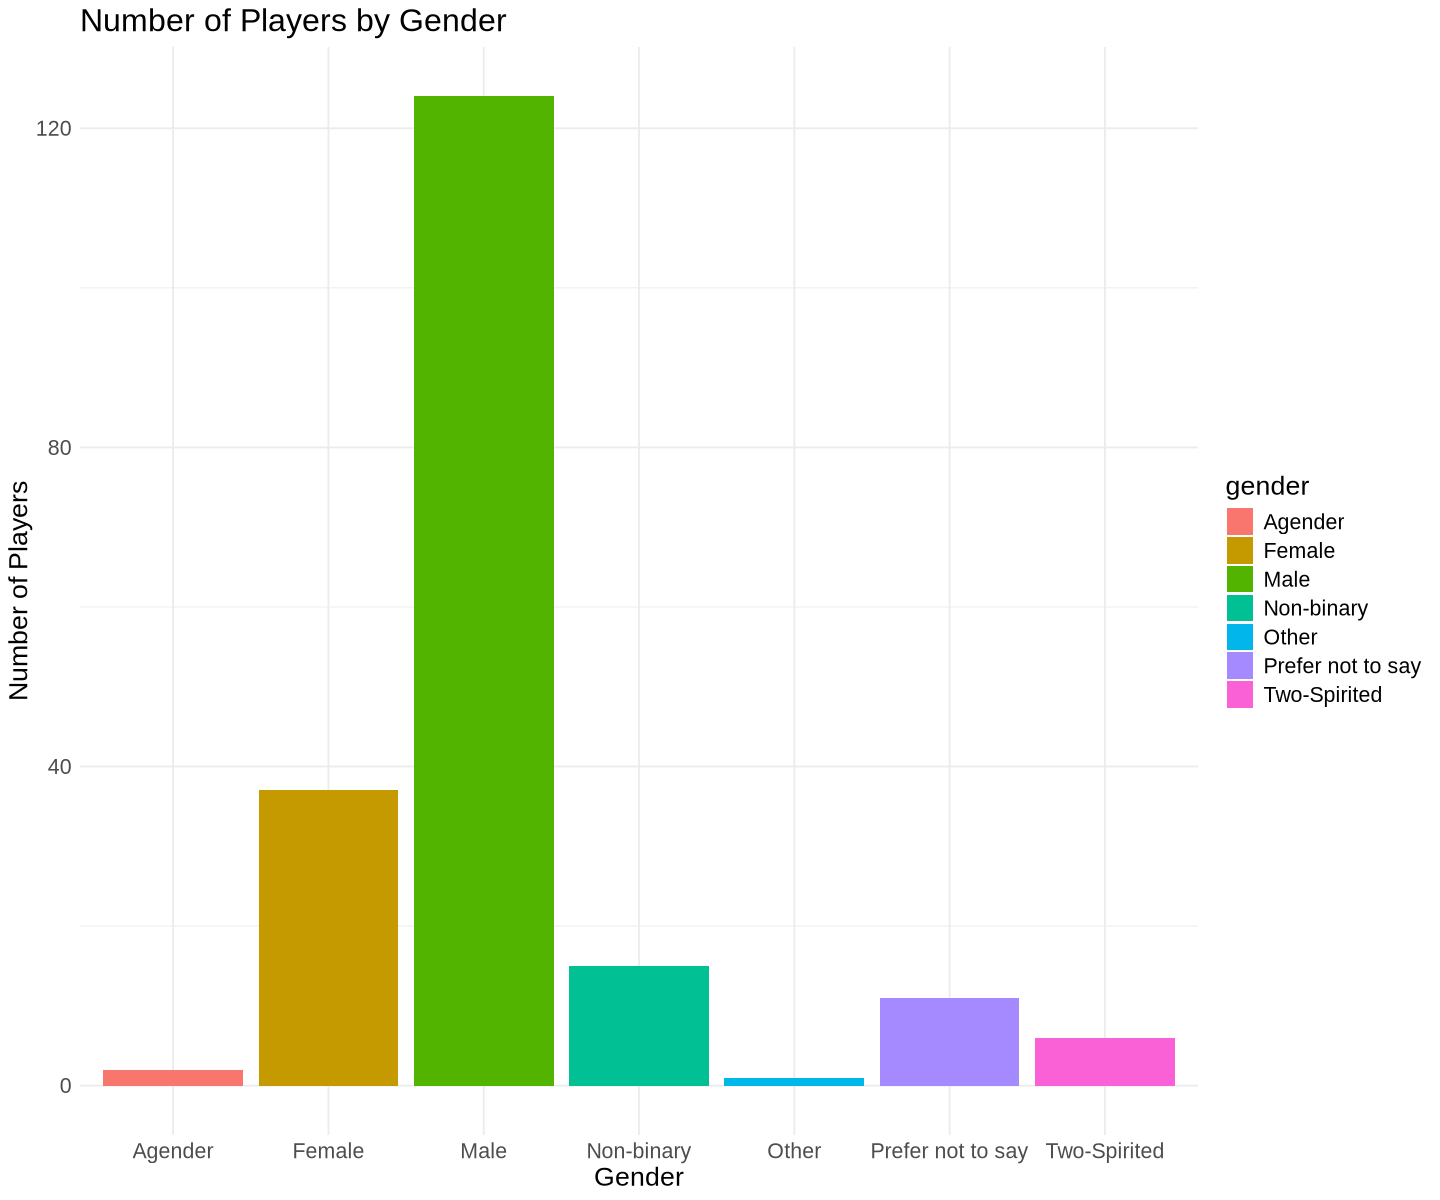

In [40]:
# Bar plot to visualize number of players among genders
options(repr.plot.width = 12, repr.plot.height = 10)
ggplot(players_data, aes(x = gender, fill = gender)) +
  geom_bar() +
  labs(title = "Number of Players by Gender", 
       x = "Gender", 
       y = "Number of Players") +
  theme_minimal() +
  theme(text = element_text(size = 16)) 

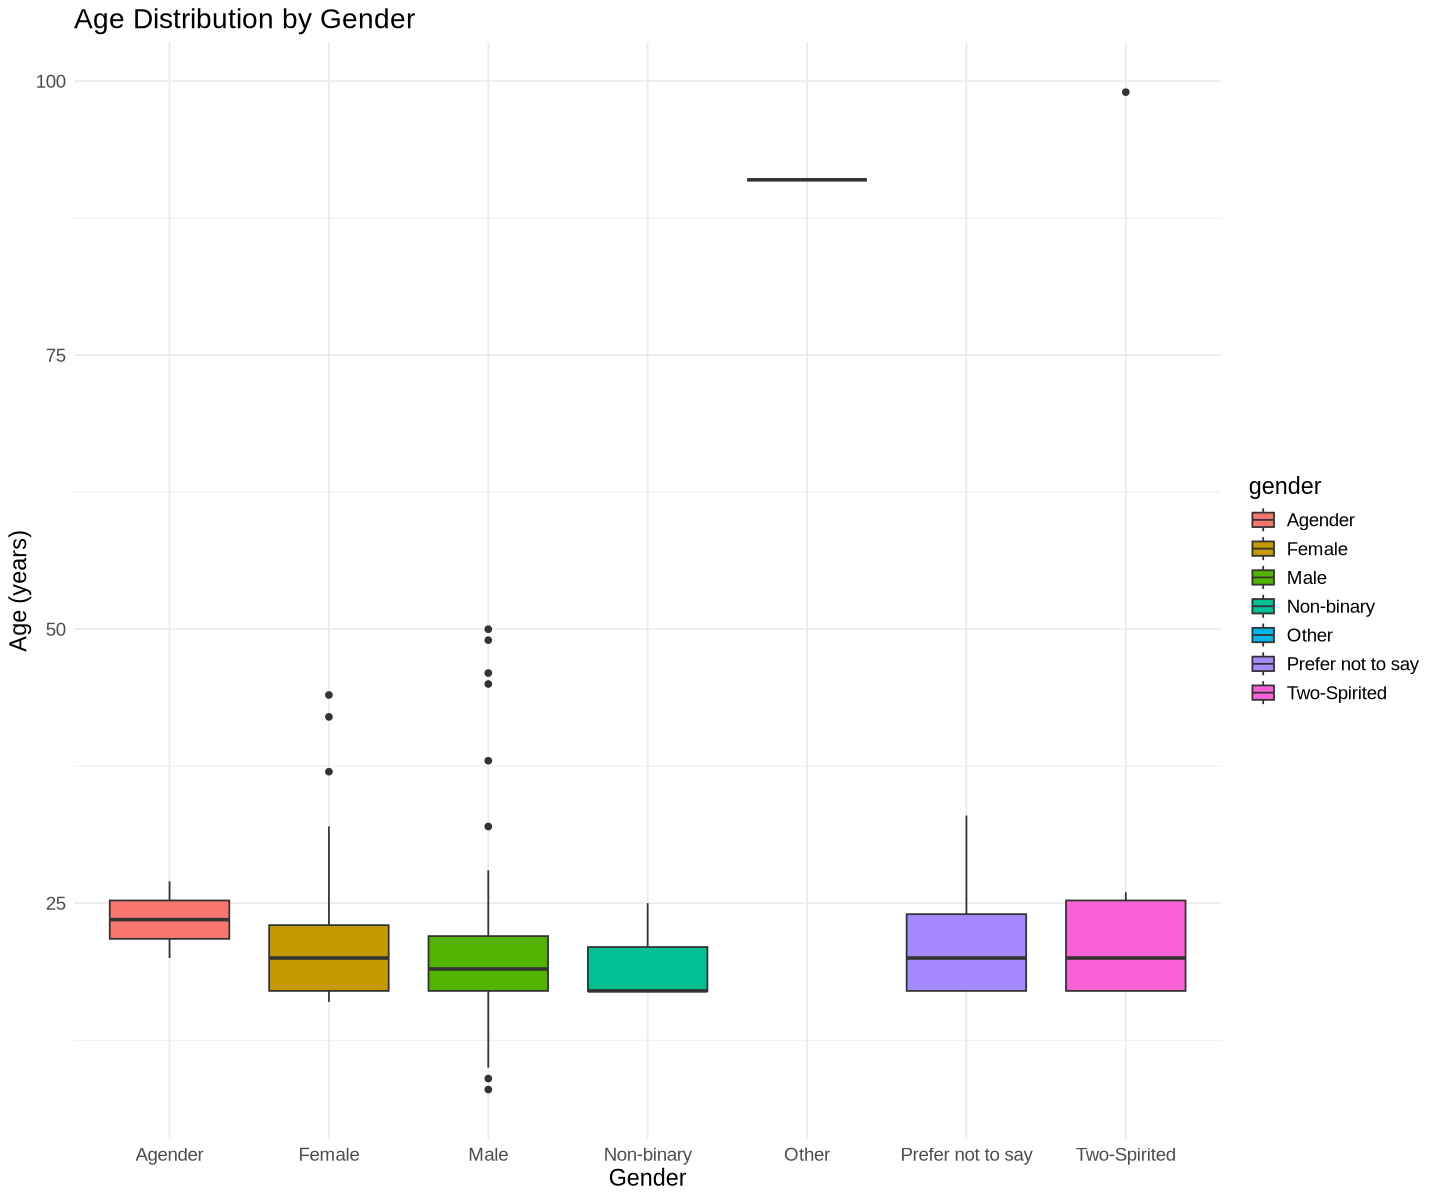

In [41]:
# Bar plot to visualize age distributions among different genders, also indicating outliers and mean
options(repr.plot.width = 12, repr.plot.height = 10)
ggplot(players_data, aes(x = gender, y = age, fill = gender)) +
    geom_boxplot() +
    labs(title = "Age Distribution by Gender", 
       x = "Gender", 
       y = "Age (years)") +
    theme_minimal() +
    theme(text = element_text(size = 14))

In [45]:
# Mutating the session data to convert timestamp columns to datetime format
sessions_mut  <- sessions |>
    mutate(original_start_time = format(as.POSIXct(original_start_time / 1000, 
                                                 origin = "1970-01-01", tz = "UTC"), "%Y-%m-%d %H:%M:%S"),
    original_end_time = format(as.POSIXct(original_end_time / 1000, 
                                          origin = "1970-01-01", tz = "UTC"), "%Y-%m-%d %H:%M:%S"))
sessions_mut

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<chr>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,2024-06-30 17:53:20,2024-06-30 17:53:20
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,2024-06-18 00:20:00,2024-06-18 00:20:00
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,2024-07-25 17:53:20,2024-07-25 17:53:20
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,2024-07-25 04:00:00,2024-07-25 04:00:00
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,2024-05-25 15:13:20,2024-05-25 15:13:20
⋮,⋮,⋮,⋮,⋮
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,10/05/2024 23:01,10/05/2024 23:07,2024-05-10 22:26:40,2024-05-10 22:26:40
7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,01/07/2024 04:08,01/07/2024 04:19,2024-07-01 05:00:00,2024-07-01 05:00:00
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,2024-07-28 15:20:00,2024-07-28 15:20:00


These two datasets, `players_data` and `sessions_mut`, have a common column, `hashedEmail`, which represents the unique identifier for each player. By combining the two datasets based on this common column, we can merge player-specific information (such as gender, age, and hours played) with session-specific data (such as session start and end times).


In [46]:
combined_data <- players_data |>
    left_join(sessions_mut, by = "hashedEmail") 
combined_data

played_hours,name,gender,age,hashedEmail,start_time,end_time,original_start_time,original_end_time
<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
30.3,Morgan,Male,9,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,08/08/2024 00:21,08/08/2024 01:35,2024-08-08 01:20:00,2024-08-08 01:20:00
30.3,Morgan,Male,9,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,09/09/2024 22:30,09/09/2024 22:37,2024-09-09 22:13:20,2024-09-09 22:13:20
30.3,Morgan,Male,9,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,08/08/2024 02:41,08/08/2024 03:25,2024-08-08 01:20:00,2024-08-08 04:06:40
30.3,Morgan,Male,9,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,10/09/2024 15:07,10/09/2024 15:29,2024-09-10 14:53:20,2024-09-10 14:53:20
30.3,Morgan,Male,9,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,05/05/2024 22:21,05/05/2024 23:17,2024-05-05 23:00:00,2024-05-05 23:00:00
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2.3,Harlow,Male,17,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,23/08/2024 21:59,23/08/2024 22:06,2024-08-23 21:53:20,2024-08-23 21:53:20
2.3,Harlow,Male,17,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,09/09/2024 02:17,09/09/2024 02:45,2024-09-09 02:46:40,2024-09-09 02:46:40
2.3,Harlow,Male,17,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,23/08/2024 21:39,23/08/2024 21:53,2024-08-23 21:53:20,2024-08-23 21:53:20


Warning message:
“Removed 73 rows containing missing values or values outside the scale range
(`geom_point()`).”


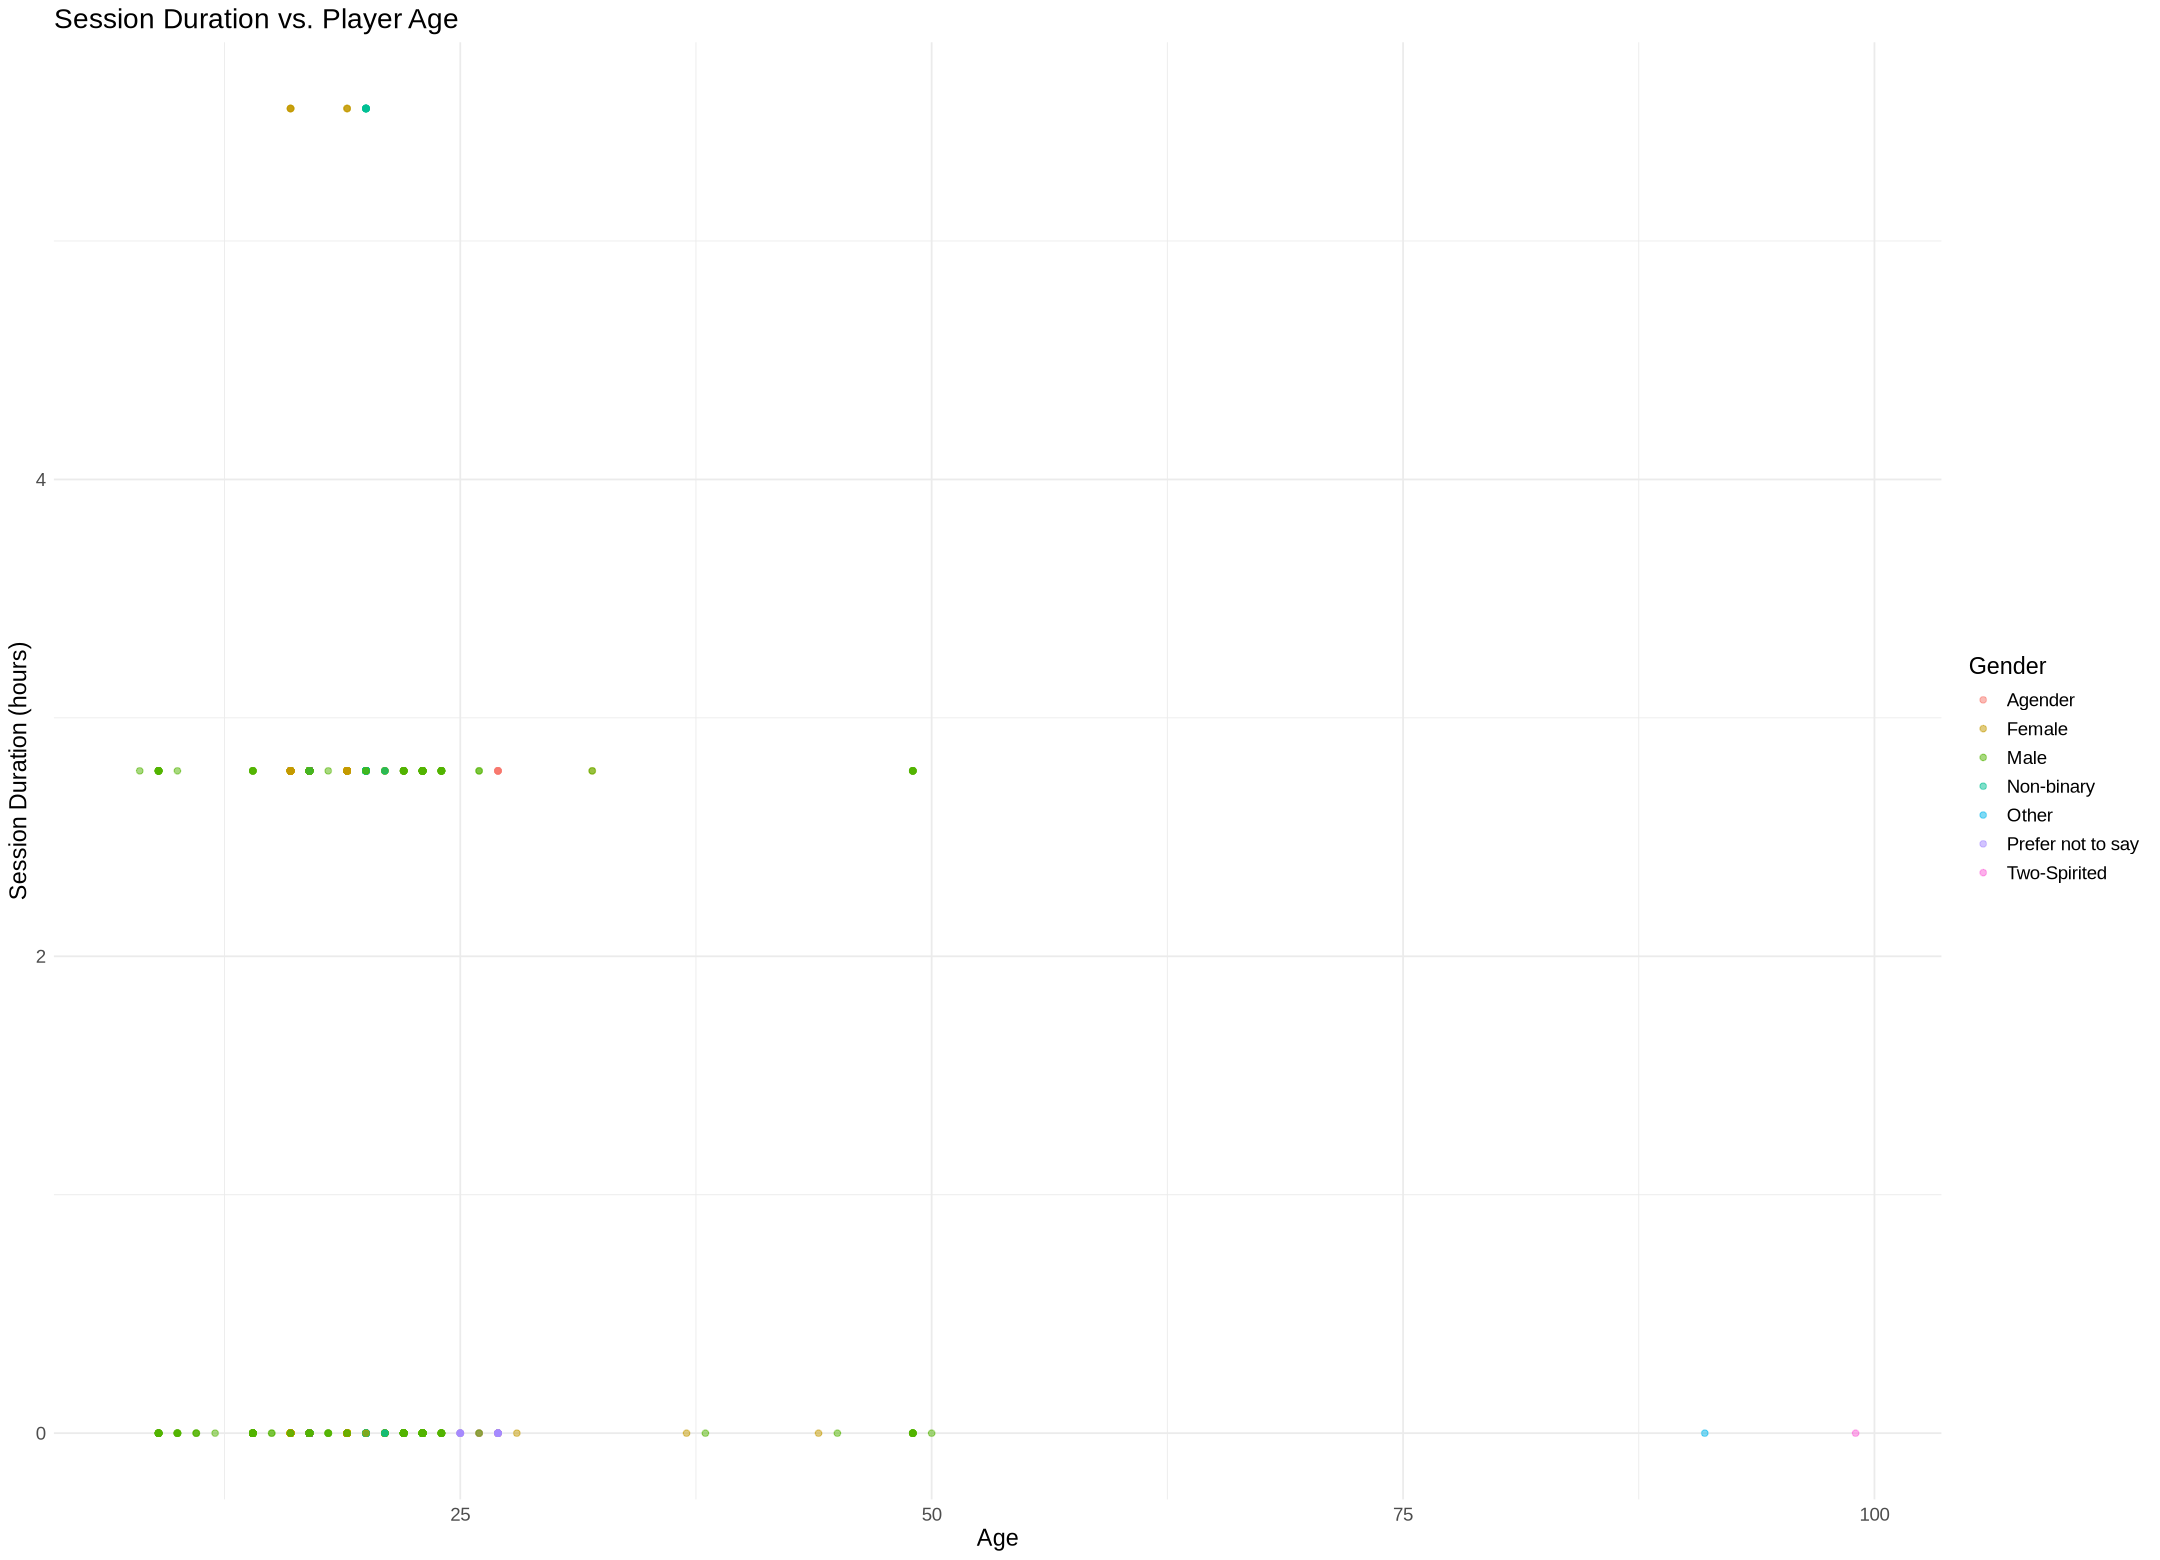

In [51]:
combined_data <- combined_data |>
  mutate(session_duration = as.numeric(difftime(original_end_time, original_start_time, units = "hours")))

options(repr.plot.width = 18, repr.plot.height = 13)
# Creating a scatter plot of session duration vs. age
ggplot(combined_data, aes(x = age, y = session_duration)) +
    geom_point(aes(color = gender), alpha = 0.5) + 
    labs(title = "Session Duration vs. Player Age", 
       x = "Age", 
       y = "Session Duration (hours)", 
       color = "Gender") +
    theme_minimal() +
    theme(text = element_text(size = 14))

**Insights:**
- *Scatter Plot of Age vs. Hours Played*:
The plot shows most players are between 15 and 25 years old, with the highest concentration in the 20 to 25 range. Most players spend 0-10 hours playing, but the distribution is unclear due to data variation. The majority of players are male.

- *Bar Plot of Number of Players by Gender*:
This plot reveals a gender imbalance, with over 120 male players and just under 40 female players. Other genders are minimally represented. This suggests higher male participation, which may influence engagement patterns.


- *Box Plot of Age Distribution by Gender*:
The plot indicates that male players' ages are more concentrated within a narrower range (15-25), with outliers around 20. Female and non-binary players show a broader age distribution with fewer outliers, suggesting more diversity in age among these groups.

- *Scatter Plot of Session Duration vs. Age:
This combined data plot shows younger players tend to have shorter sessions (0-3 hours), while older players have slightly longer sessions. Males exhibit a wider range of session durations compared to females.


## 4. METHODS AND PLAN 
To answer our research question, I propose using **K-Nearest Neighbors (KNN) regression**. This model is appropriate because it does not assume a specific form for the data and can handle complex, non-linear relationships between the predictors (age, gender) and the target (session duration/hours played). Given that we are predicting session duration/play time, which is continuous, KNN regression allows to predict the value for a given player by averaging the values of the k nearest neighbors. This approach captures local patterns in the data, which is ideal when the relationship is not linear or easily modeled. Additionally, KNN is relatively easy to interpret and implement, making it a great choice when the relationships between features are complex.

The primary assumption behind KNN regression is that similar data points have similar values. This means that players with similar ages and genders should have similar session durations. However, KNN does not make any assumptions about the underlying data distribution, making it a non-parametric method. It is also crucial to perform preprocessing steps like scaling features and handling missing values for accurate predictions. 

**KNN regression has certain limitations:**
- KNN can be slow during prediction, especially with large datasets, as it requires calculating the distance between the new data point and all existing points.
- KNN is sensitive to outliers and noisy data, which can affect the prediction accuracy.
- Since KNN relies on measuring distances between data points, it requires features to be on the same scale. Age and gender, in particular, might need to be transformed.
To mitigate these weaknesses, we will by scaling the features and handling outliers carefully.

**Model comparison and selection:**
To choose the optimal KNN regression model, we need to find the best value for the number of neighbours (k). A smaller k value leads to overfitting (high variance), while a larger k value may smooth the predictions too much (high bias). We can perform cross-validation (e.g., 5-fold cross-validation) and look over the error metrics. By comparing, we can identify the k value that minimizes prediction error. 

Additionally, we can evaluate the results with a train-test split. The dataset can be split into training (80%) and testing (20%) sets which are typical separation ratios. The model can be trained on the training data, and its performance will be evaluated on the testing data. By doing this we can make sure of the accurate performance.

*Before applying the KNN regression model, we will also preprocess:*
- Any missing data in the main columns will be either removed or we can use imputation methods (such as mean or median) to fill in missing data.
- KNN is a distance-based algorithm, and to make sure that all features contribute equally to the distance calculation, we will scale numerical features (age, hours played...). We can use techniques like Min-Max scaling or Standardization to transform the data into a comparable scale.
- Since gender is a categorical variable, it may need to be encoded into a format that KNN can use such as label encoding.

